In [17]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns; sns.set()
import utils as u
import numpy as np
from subprocess import call
from PIL import Image
from cv2 import imwrite
import os

Creo los Datasets

In [9]:
for i in range (10):
    if not os.path.exists('../assets/ImagenesCarasR{}'.format(i+1)):
        os.makedirs('../assets/ImagenesCarasR{}'.format(i+1))
    for j in range(41):
        if not os.path.exists('../assets/ImagenesCarasR{}/s{}'.format(i+1, j+1)):
            os.makedirs('../assets/ImagenesCarasR{}/s{}'.format(i+1, j+1))
        for k in range(10):
            filename = '../assets/ImagenesCaras/s{}/{}.pgm'.format(j+1, k+1)
            imagea = (plt.imread(filename)).astype(float)
            poissonNoise = np.random.poisson(15*(i+1),imagea.shape).astype(float)
            poissonNoise2 = []
            for fil in range(len(poissonNoise)):
                poissonNoise2.append([])
                for pos in range(len(poissonNoise[fil])):
                    poissonNoise2[fil].append(int(poissonNoise[fil][pos]*(np.random.choice([1, -1]))))
            noisyImage = imagea + poissonNoise2
            imwrite('../assets/ImagenesCarasR{}/s{}/{}.pgm'.format(i+1, j+1, k+1),noisyImage)
if not os.path.exists('../assets/ImagenesCarasR4'):
        os.makedirs('../assets/ImagenesCarasR4')
# for j in range(41):
#     if not os.path.exists('../assets/ImagenesCarasR10/s{}'.format(j+1)):
#         os.makedirs('../assets/ImagenesCarasR10/s{}'.format(j+1))
#     for k in range(10):
#         filename = '../assets/ImagenesCaras/s{}/{}.pgm'.format(j+1, k+1)
#         imagea = (plt.imread(filename)).astype(float)
#         poissonNoise = np.random.poisson(15*k,imagea.shape).astype(float)
#         poissonNoise2 = []
#         for fil in range(len(poissonNoise)):
#             poissonNoise2.append([])
#             for pos in range(len(poissonNoise[fil])):
#                 poissonNoise2[fil].append(int(poissonNoise[fil][pos]*(np.random.choice([1, -1]))))
#         noisyImage = imagea + poissonNoise2
#         imwrite('../assets/ImagenesCarasR10/s{}/{}.pgm'.format(j+1, k+1),noisyImage)

Creo Inputs

In [10]:
# if not os.path.exists('expRuido'):
#     os.makedirs('expRuido')
# for i in range(4):
#     file = open("expRuido/testFull{}.in".format(i+1),"w+")
#     for j in range(41):
#         for k in range(10):
#             file.write("../assets/ImagenesCarasR{}/s{}/{}.pgm, {},\n".format(i+1, j+1, k+1, j+1))
#     file.close()
    
if not os.path.exists('expRuido'):
    os.makedirs('expRuido')
for i in range(10):
    file = open("expRuido/testFull{}.in".format(i+1),"w+")
    for j in range(41):
        for k in range(10):
            file.write("../assets/ImagenesCarasR{}/s{}/{}.pgm,\n".format(i+1, j+1, k+1))
    file.close()

Preparo valores y hago el call

In [39]:
# knn = 3
# a = 17
# kfolds = 10
# inp = ['catedra/testFullBig.in', 'expRuido/testFull1.in', 'expRuido/testFull2.in', 'expRuido/testFull3.in', 'expRuido/testFull4.in']
# for i in range(5):
#     if not os.path.exists('expRuido/r{}'.format(i)):
#         os.makedirs('expRuido/r{}'.format(i))
# out = 'expRuido/r{}/result'
# for i in range(4):
#     call(['../src/main', '-m', '3', '-i', inp[i+1],'-o', out.format(i+1), '-knn-k', str(knn), '-alpha', str(a), '-k-folds', str(kfolds)])

In [12]:
knn = 3
a = 17
train = 'catedra/testFullBig.in'
test = ['catedra/testFullBig.in']
for i in range(10):
    test.append('expRuido/testFull{}.in'.format(i))
out = 'expRuido/result{}'
for i in range(11):
    call(['../src/main', '-m', '1', '-i', train, '-q', test[i], '-o', out.format(i), '-knn-k', str(knn), '-alpha', str(a)])

Levanto y trabajo con los resltados

In [83]:
# vecTod=[[] for i in range(5)]
# vecExp=[[] for i in range(5)]
# for k in range(5):
#     i=0
#     j=-1
#     file = open("expRuido/r{}/result.conf".format(k),"r")
#     filelist=list(file)
#     for line in range(len(filelist)):
#         filevect = str.split(filelist[line])
#         if (len(filevect)<41):
#             continue
#         else:
#             if(i % 41 == 0):
#                 vecTod[k].append([])
#                 vecExp[k].append([])
#                 j+=1
#             i+=1
#             for pos in range(len(filevect)):
#                 for value in range(int(filevect[pos])):
#                     vecTod[k][j].append(pos+1)
#                     exp = (line % 41)
#                     if(exp==0):
#                         exp=41
#                     vecExp[k][j].append(exp)
#     file.close()

In [30]:
allVects = []
for k in range(11):
    i=0
    j=-1
    file = open("expRuido/result{}".format(k),"r")
    filestr = file.read().split(',\n')
    filevect = []
    for i in range(len(filestr)-1):
        filevect.append(int(filestr[i]))
    allVects.append(filevect)
    file.close()
expectedVect = []
for i in range(41):
    for j in range(10):
        expectedVect.append(i+1)
lab=[i+1 for i in range(41)]
allPrecs = []
for i in range(11):
    allPrecs.append(precision_recall_fscore_support(expectedVect, allVects[i], labels=lab)[1])

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


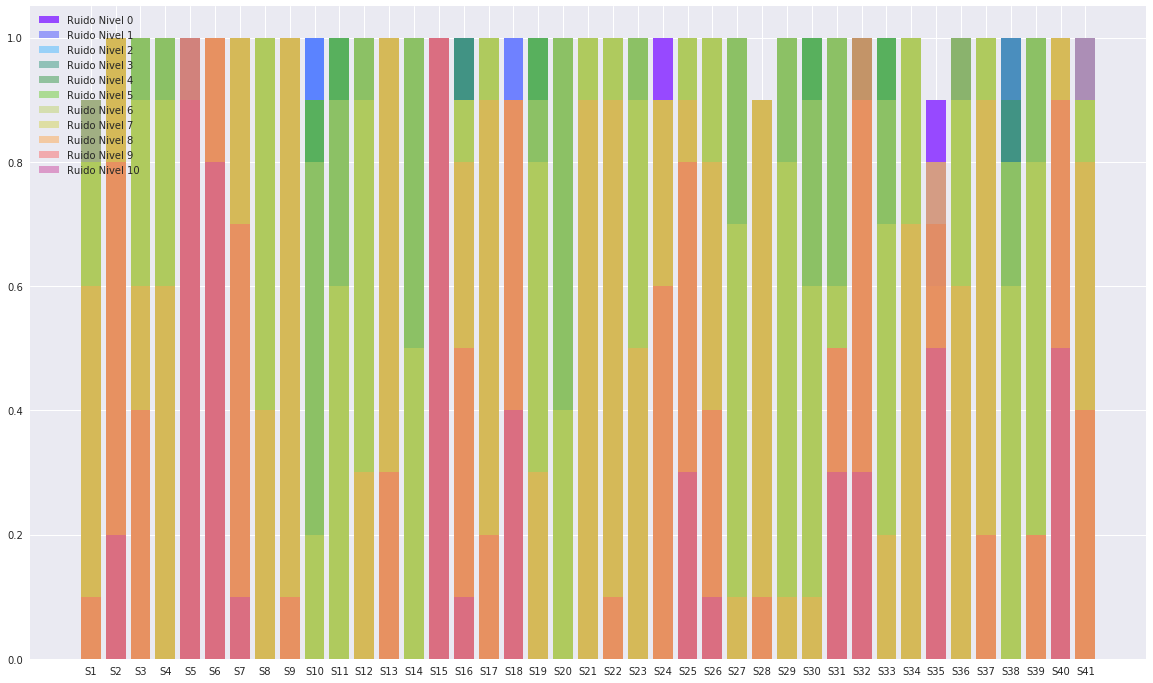

In [33]:
plt.bar(lab, allPrecs[0], color='#9749ff', label='Ruido Nivel 0')
plt.bar(lab, allPrecs[1], color='#4952ff', alpha=0.5, label='Ruido Nivel 1')
plt.bar(lab, allPrecs[2], color='#49b9ff', alpha=0.5, label='Ruido Nivel 2')
plt.bar(lab, allPrecs[3], color='#3a997f', alpha=0.5, label='Ruido Nivel 3')
plt.bar(lab, allPrecs[4], color='#3a994b', alpha=0.5, label='Ruido Nivel 4')
plt.bar(lab, allPrecs[5], color='#6fce37', alpha=0.5, label='Ruido Nivel 5')
plt.bar(lab, allPrecs[6], color='#c1d36e', alpha=0.5, label='Ruido Nivel 6')
plt.bar(lab, allPrecs[7], color='#d3d358', alpha=0.5, label='Ruido Nivel 7')
plt.bar(lab, allPrecs[8], color='#fcaa53', alpha=0.5, label='Ruido Nivel 8')
plt.bar(lab, allPrecs[9], color='#f96b6b', alpha=0.5, label='Ruido Nivel 9')
plt.bar(lab, allPrecs[10], color='#ce4ca1', alpha=0.5, label='Ruido Nivel 10')

plt.xticks(lab, 
           ['S{}'.format(i+1) for i in range(41)] )

plt.legend()

plt.rcParams['figure.figsize'] = (30, 18)

plt.show()